Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

### snippet 4.8

Show first 5 rows of DataFrame df

In [4]:
first(df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### snippet 4.9

Show first 5 heigth values in df

In [5]:
first(df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### snippet 4.10

Use only adults

In [6]:
df2 = filter(row -> row[:age] >= 18, df);

Our model:

In [7]:
m4_1 = "
  height ~ Normal(μ, σ) # likelihood
  μ ~ Normal(178,20) # prior
  σ ~ Uniform(0, 50) # prior
";

Plot the densities.

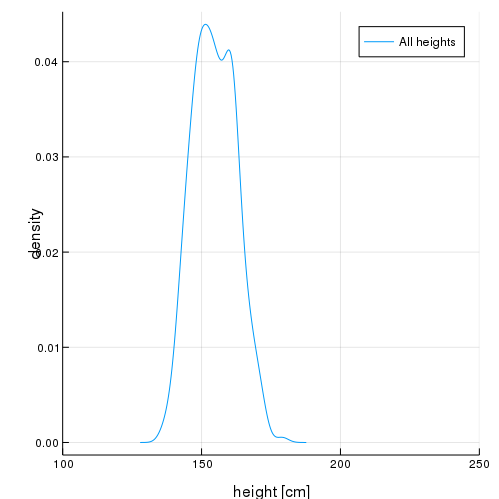

In [8]:
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 3)
p[1] = density(df2[:height], xlim=(100,250), lab="All heights", xlab="height [cm]", ylab="density")

### snippet 4.10

Show  μ prior

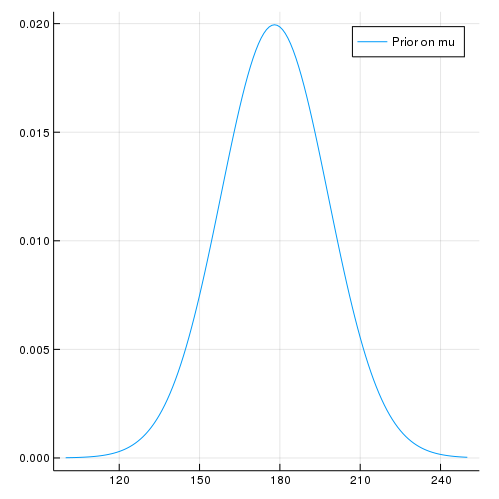

In [9]:
d1 = Normal(178, 20)
p[2] = plot(100:250, [pdf(d1, μ) for μ in 100:250], lab="Prior on mu")

### snippet 4.11

Show σ  prior

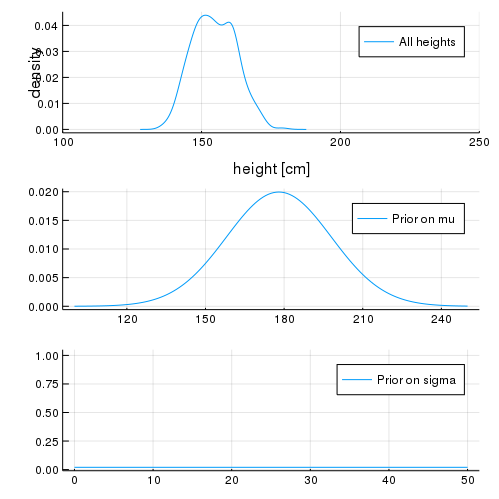

In [10]:
d2 = Uniform(0, 50)
p[3] = plot(0:0.1:50, [pdf(d2, σ) for σ in 0:0.1:50], lab="Prior on sigma")

plot(p..., layout=(3,1))

### snippet 4.13

In [11]:
sample_mu = rand(d1, 10000)
sample_sigma = rand(d2, 10000)
prior_height = [rand(Normal(sample_mu[i], sample_sigma[i]), 1)[1] for i in 1:10000]
df2 = DataFrame(mu = sample_mu, sigma=sample_sigma, prior_height=prior_height);
first(df2, 5)

,mu,sigma,prior_height
,Float64,Float64,Float64
1,190.505,46.9305,240.047
2,225.949,4.54639,214.186
3,167.026,49.1388,135.891
4,178.518,24.0083,166.743
5,195.953,48.182,155.782


Show density of prior_height

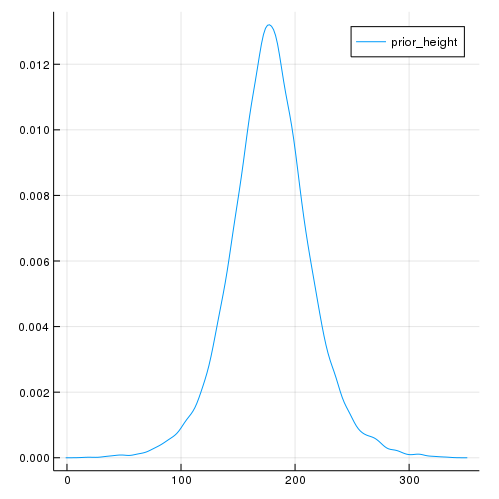

In [12]:
density(prior_height, lab="prior_height")

Use data from m4.1s to show CmdStan results

Check if the m4.1s.jls file is present. If not, run the model.

In [13]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type Chains, with data of type 1000×2×4 Array{Float64,3}

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
internals         = 
parameters        = sigma, mu

Summary Statistics

│ Row │ parameters │ mean    │ std      │ naive_se   │ mcse       │ ess    │
│     │ Symbol     │ Float64 │ Float64  │ Float64    │ Float64    │ Any    │
├─────┼────────────┼─────────┼──────────┼────────────┼────────────┼────────┤
│ 1   │ mu         │ 154.609 │ 0.432361 │ 0.00683622 │ 0.00673822 │ 4000.0 │
│ 2   │ sigma      │ 7.77284 │ 0.307828 │ 0.00486719 │ 0.00544078 │ 4000.0 │

Describe the draws

In [14]:
describe(chn)

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean    │ std      │ naive_se   │ mcse       │ ess    │
│     │ Symbol     │ Float64 │ Float64  │ Float64    │ Float64    │ Any    │
├─────┼────────────┼─────────┼──────────┼────────────┼────────────┼────────┤
│ 1   │ mu         │ 154.609 │ 0.432361 │ 0.00683622 │ 0.00673822 │ 4000.0 │
│ 2   │ sigma      │ 7.77284 │ 0.307828 │ 0.00486719 │ 0.00544078 │ 4000.0 │

Quantiles

│ Row │ parameters │ 2.5%    │ 25.0%   │ 50.0%   │ 75.0%   │ 97.5%   │
│     │ Symbol     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ mu         │ 153.768 │ 154.317 │ 154.608 │ 154.897 │ 155.47  │
│ 2   │ sigma      │ 7.1841  │ 7.56068 │ 7.76757 │ 7.97718 │ 8.38197 │


Plot the density of posterior draws

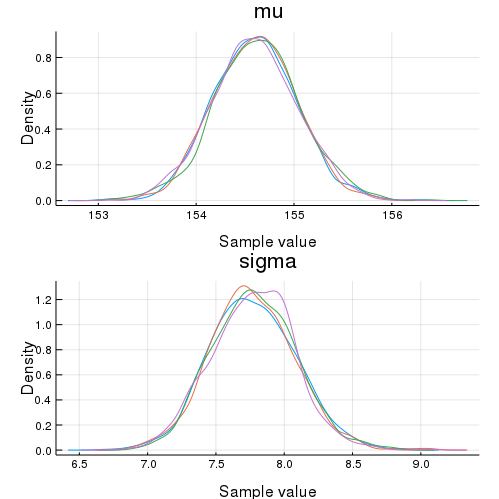

In [15]:
density(chn)

End of `clip-07-13s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*